# Question 3: Unsupervised Learning
## 90-803 Machine Learning Foundations with Python (Spring 2024)
### Team 17: Yoko, Tessa, Hannah

This notebook attempts to explore question #3 of our project. <br><br>
**Question #3:** Are there any hidden structures or associations between housing prices and average temperature in this dataset that is worth exploring?<br>
*Target Variable:* None<br>
*Task:* Unsupervised learning to uncover hidden patterns in the dataset that are valuable for classification/grouping.

## Importing the Relevant Libraries

In [1]:
# common libraries
from datetime import datetime
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# metrics
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# scalers
from sklearn.preprocessing import StandardScaler

# unsupervised learning (clustering) libraries
from sklearn.cluster import AgglomerativeClustering, KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
import scipy as sp
from scipy.cluster.hierarchy import linkage,dendrogram

# PCA libraries
from sklearn.decomposition import PCA
from yellowbrick.features import PCA as PCA_viz

## Initial Exploration
We will first explore the dataset and pick the appropriate columns for unsurpervised learning (numerical feature only).

In [2]:
# read in the dataset
data = pd.read_csv("all_data_geo.csv", index_col=0)
data.head()

Year  Month          RegionName State  \
0  2000      1  Los Angeles County    CA   
1  2000      1  Los Angeles County    CA   
2  2000      1         Cook County    IL   
3  2000      1         Cook County    IL   
4  2000      1       Harris County    TX   

   Bottom-Tier Average Home Value Estimate  \
0                            122826.545216   
1                            122826.545216   
2                             71689.188026   
3                             71689.188026   
4                             61195.175569   

   Top-Tier Average Home Value Estimate  Average Temperature Value  \
0                         400192.738911                       52.3   
1                         400192.738911                       52.3   
2                         302264.545103                       24.9   
3                         302264.545103                       24.9   
4                         217850.462915                       57.4   

   Anomaly (1901-2000 base period)  1901-2000 Mean  \
0                              4.5            47.8   
1                              4.5            47.8   
2                              2.4            22.5   
3                              2.4            22.5   
4                              5.6            51.8   

   Initial Fees and Charges (%)  Effective Rate (%)  Term to Maturity  \
0                          0.93                8.01                15   
1                          0.81                8.20                30   
2                          0.93                8.01                15   
3                          0.81                8.20                30   
4                          0.93                8.01                15   

   Loan Amount ($thou)  Purchase Price ($thou)  Loan-to-Price Ratio (%)  \
0                103.0                   173.6                     64.7   
1                129.9                   166.8                     81.1   
2                103.0                   173.6                     64.7   
3                129.9                   166.8                     81.1   
4                103.0                   173.6                     64.7   

   Share of Total Market (%)        ALAND      AWATER   INTPTLAT    INTPTLON  
0                        7.0  10515988166  1785003207  34.196398 -118.261862  
1                       61.1  10515988166  1785003207  34.196398 -118.261862  
2                        7.0   2447342616  1786339408  41.894294  -87.645455  
3                       61.1   2447342616  1786339408  41.894294  -87.645455  
4                        7.0   4421145870   182187806  29.857273  -95.393037

In [3]:
# we cannot do unsupervised learning on columns that contains strings so we need to get the numeric columns we need out
unsupervised = data[data.columns.difference(['State', 'RegionName'])]
unsupervised.head(5)

1901-2000 Mean        ALAND      AWATER  Anomaly (1901-2000 base period)  \
0            47.8  10515988166  1785003207                              4.5   
1            47.8  10515988166  1785003207                              4.5   
2            22.5   2447342616  1786339408                              2.4   
3            22.5   2447342616  1786339408                              2.4   
4            51.8   4421145870   182187806                              5.6   

   Average Temperature Value  Bottom-Tier Average Home Value Estimate  \
0                       52.3                            122826.545216   
1                       52.3                            122826.545216   
2                       24.9                             71689.188026   
3                       24.9                             71689.188026   
4                       57.4                             61195.175569   

   Effective Rate (%)   INTPTLAT    INTPTLON  Initial Fees and Charges (%)  \
0                8.01  34.196398 -118.261862                          0.93   
1                8.20  34.196398 -118.261862                          0.81   
2                8.01  41.894294  -87.645455                          0.93   
3                8.20  41.894294  -87.645455                          0.81   
4                8.01  29.857273  -95.393037                          0.93   

   Loan Amount ($thou)  Loan-to-Price Ratio (%)  Month  \
0                103.0                     64.7      1   
1                129.9                     81.1      1   
2                103.0                     64.7      1   
3                129.9                     81.1      1   
4                103.0                     64.7      1   

   Purchase Price ($thou)  Share of Total Market (%)  Term to Maturity  \
0                   173.6                        7.0                15   
1                   166.8                       61.1                30   
2                   173.6                        7.0                15   
3                   166.8                       61.1                30   
4                   173.6                        7.0                15   

   Top-Tier Average Home Value Estimate  Year  
0                         400192.738911  2000  
1                         400192.738911  2000  
2                         302264.545103  2000  
3                         302264.545103  2000  
4                         217850.462915  2000

In [4]:
# check the shape of unsupervised
unsupervised.shape

(579894, 18)

In [5]:
# double check NaN values one more time
unsupervised.isnull().sum()

1901-2000 Mean                             0
ALAND                                      0
AWATER                                     0
Anomaly (1901-2000 base period)            0
Average Temperature Value                  0
Bottom-Tier Average Home Value Estimate    0
Effective Rate (%)                         0
INTPTLAT                                   0
INTPTLON                                   0
Initial Fees and Charges (%)               0
Loan Amount ($thou)                        0
Loan-to-Price Ratio (%)                    0
Month                                      0
Purchase Price ($thou)                     0
Share of Total Market (%)                  0
Term to Maturity                           0
Top-Tier Average Home Value Estimate       0
Year                                       0
dtype: int64

In [6]:
# have an overview of our dataset
unsupervised.describe()

1901-2000 Mean         ALAND        AWATER  \
count   579894.000000  5.798940e+05  5.798940e+05   
mean        54.317547  2.338742e+09  1.819740e+08   
std         17.099949  3.703393e+09  5.523955e+08   
min          1.800000  5.868388e+07  9.251200e+04   
25%         41.300000  1.055922e+09  1.047176e+07   
50%         55.500000  1.479110e+09  2.694270e+07   
75%         68.800000  2.206699e+09  8.116171e+07   
max         91.700000  5.197631e+10  1.405367e+10   

       Anomaly (1901-2000 base period)  Average Temperature Value  \
count                    579894.000000              579894.000000   
mean                          1.385632                  55.702485   
std                           3.388082                  17.135498   
min                         -22.200000                  -5.200000   
25%                          -0.700000                  42.800000   
50%                           1.300000                  57.200000   
75%                           3.400000                  70.000000   
max                          19.800000                  96.200000   

       Bottom-Tier Average Home Value Estimate  Effective Rate (%)  \
count                            579894.000000       579894.000000   
mean                              94103.848741            4.955709   
std                               64177.827177            1.232351   
min                                6109.396309            2.890000   
25%                               52879.469613            3.980000   
50%                               77205.031646            4.650000   
75%                              115764.095664            5.960000   
max                              915009.312632            8.550000   

            INTPTLAT       INTPTLON  Initial Fees and Charges (%)  \
count  579894.000000  579894.000000                 579894.000000   
mean       37.986718     -89.613755                      0.891515   
std         4.615860      12.635366                      0.365064   
min        25.586120    -124.210929                      0.180000   
25%        34.763109     -94.888456                      0.540000   
50%        38.423084     -86.034263                      0.910000   
75%        41.355319     -81.400955                      1.220000   
max        48.842653     -68.666616                      1.510000   

       Loan Amount ($thou)  Loan-to-Price Ratio (%)          Month  \
count        579894.000000            579894.000000  579894.000000   
mean            177.251586                72.512364       6.434317   
std              36.994047                 8.549974       3.466285   
min              60.300000                42.300000       1.000000   
25%             150.900000                67.100000       3.000000   
50%             179.800000                74.800000       6.000000   
75%             204.400000                80.300000       9.000000   
max             254.800000                83.500000      12.000000   

       Purchase Price ($thou)  Share of Total Market (%)  Term to Maturity  \
count           579894.000000              579894.000000     579894.000000   
mean               260.126543                  37.364843         22.500000   
std                 36.813915                  29.181675          7.500006   
min                124.000000                   1.300000         15.000000   
25%                237.700000                   7.700000         15.000000   
50%                262.500000                  32.450000         22.500000   
75%                286.100000                  65.500000         30.000000   
max                347.300000                  82.900000         30.000000   

       Top-Tier Average Home Value Estimate           Year  
count                          5.798940e+05  579894.000000  
mean                           2.851340e+05    2010.712761  
std                            2.108634e+05       5.361191  
min                            5.947229e+04    2000.000000  
25%            

> We definitely need to scale our dataset for unsupervised.

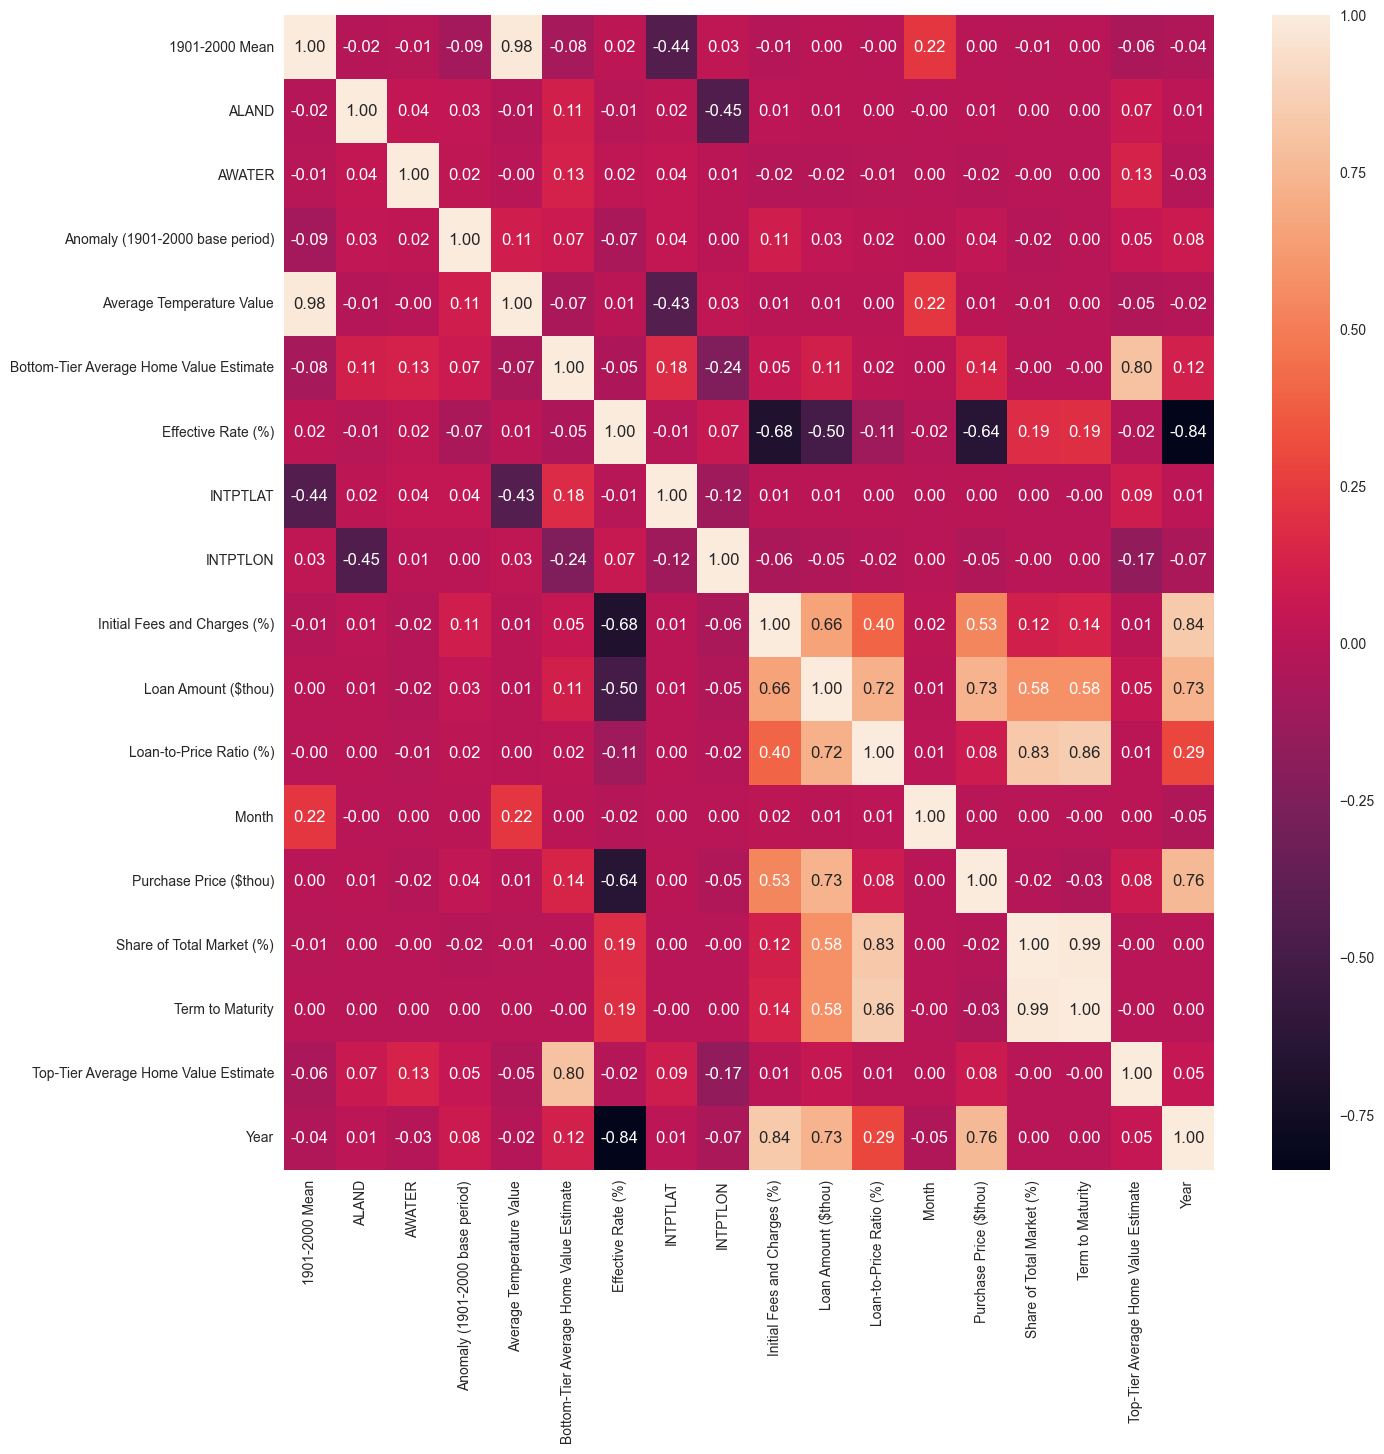

In [7]:
# double check colinearity
plt.figure(figsize=(15,15))
sns.heatmap(unsupervised.corr(), annot=True, fmt ='.2f')
plt.show()

> A brief glance shows that we have colinearity for many features such as initial fees and effective rates, effective rates and purchase prices, average temperature and 1901-2000 mean. We also have a lot of data with 18 features, so we should do PCA on our dataset for better unsupervised results.

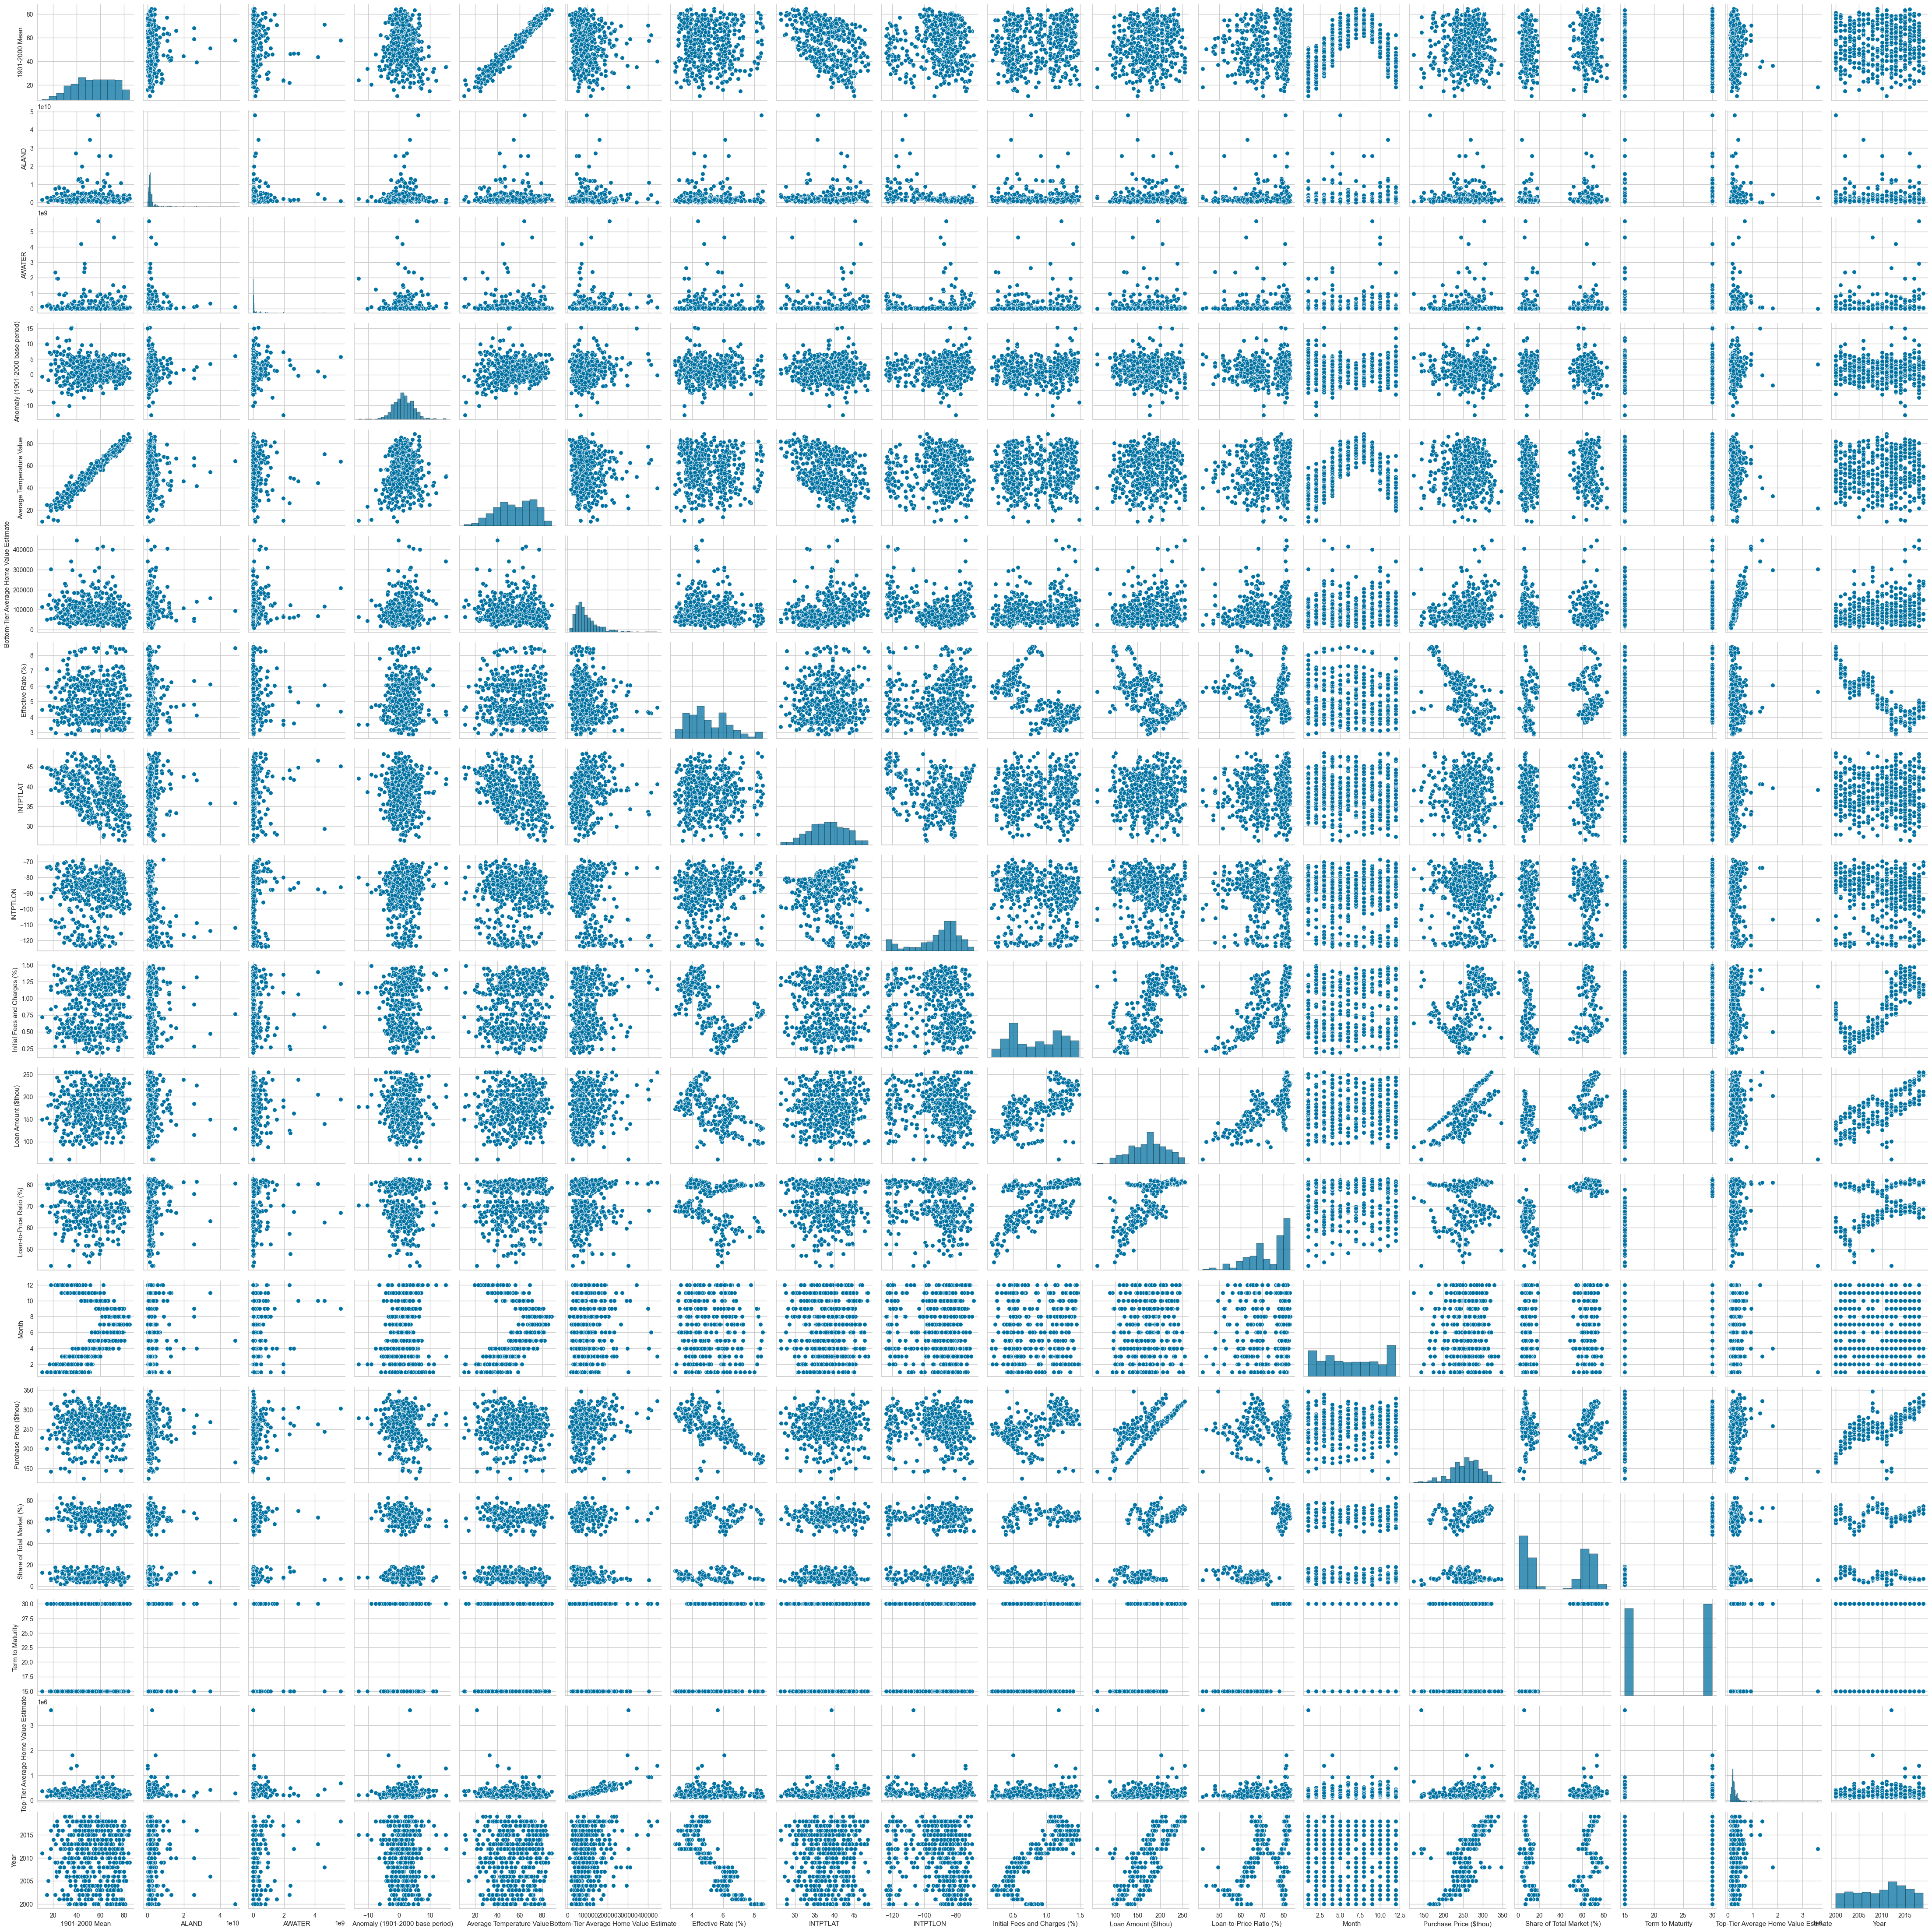

In [8]:
# visualize the clusters through a pairplot of a smaller sample of the dataset (it would take too long to plot the entire dataset)
sns.pairplot(unsupervised.sample(500))
plt.xticks(rotation = 45)
plt.show()

> It seems that Month, Year, and Term to Maturity are categorical values that create natural clusters but do not provide new information for our dataset. With a sample of 500 points, we can see some clustering with Share of Total Market.

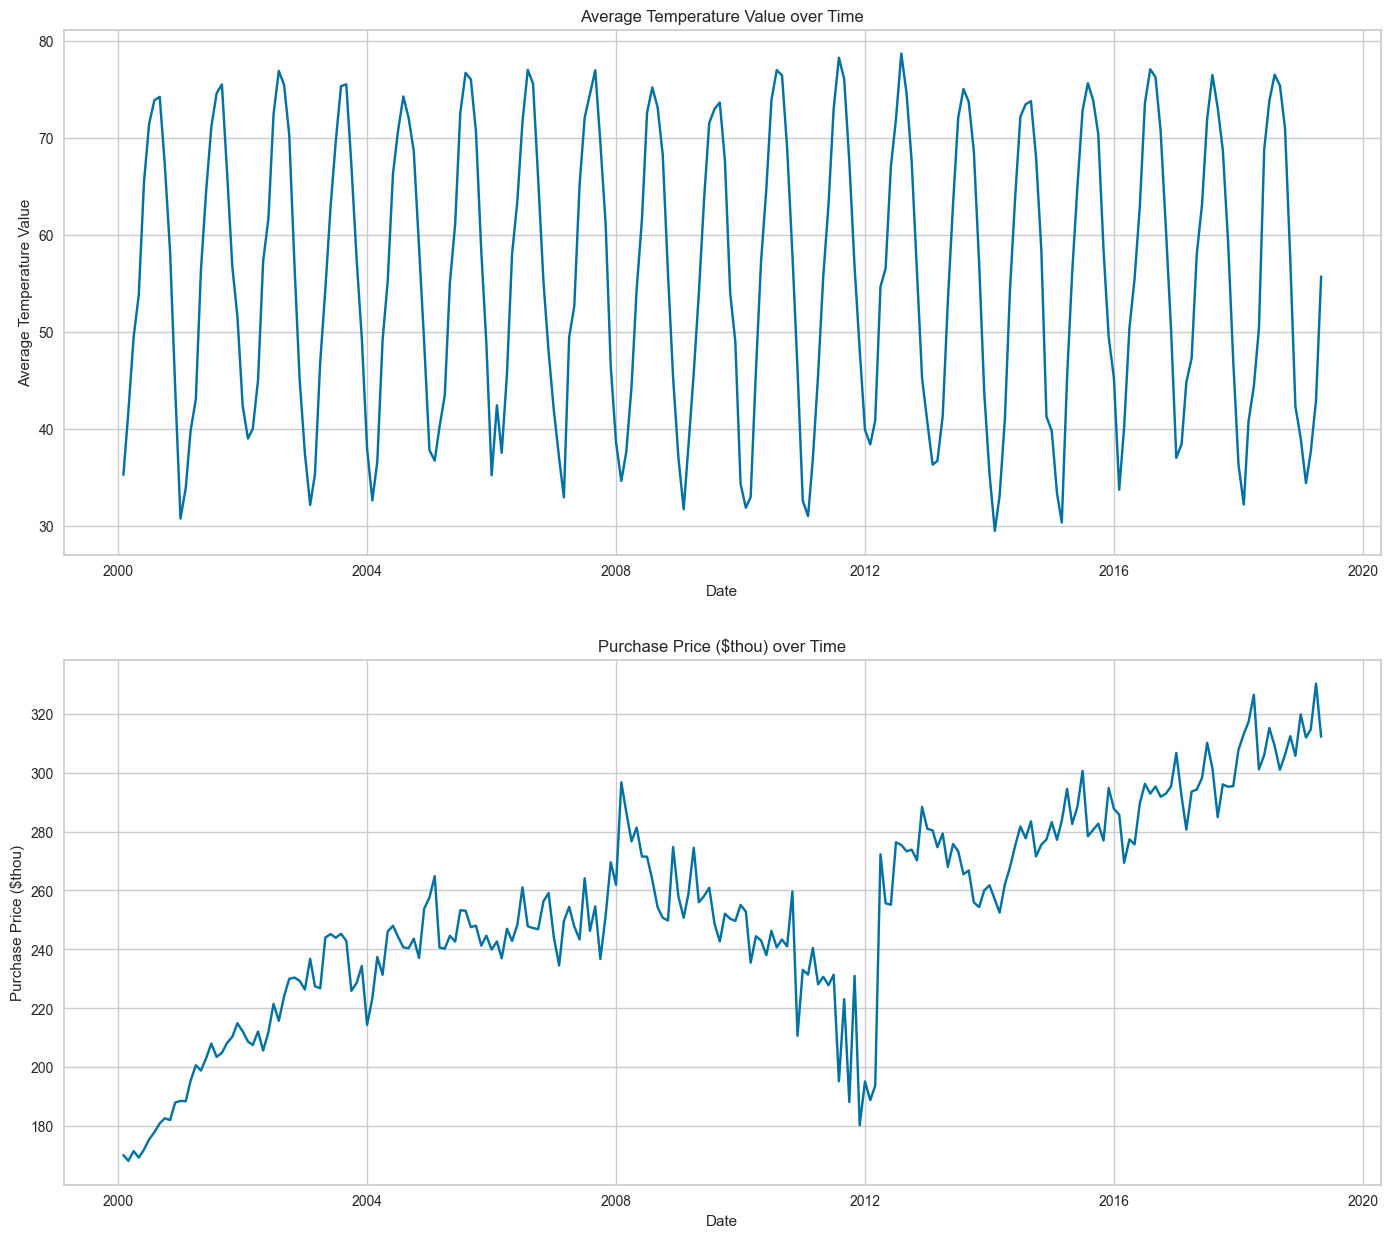

In [9]:
# we have a lot of data and one of our previous visualization shows seasonality so let us check that for housing prices and average temperature
# plotting average housing prices and average temperature over time to check for seasonality
fig, ax = plt.subplots(2,1, figsize=(17,15))

cols = ['Average Temperature Value', 'Purchase Price ($thou)']

for i in range(2):
    data = unsupervised[['Year','Month',cols[i]]].groupby(['Year','Month']).mean().reset_index()
    data['Date'] = pd.date_range(start="2000-01-01",end="2019-05-01", freq='ME').tolist()
    sns.lineplot(data = data, x = 'Date', y = cols[i], ax=ax[i]).set(title= cols[i]+' over Time')

plt.show()

> There clearly is seasonality for average temperature, but it's not clear for housing prices so let's zoom into two years: 2016 and 2017.

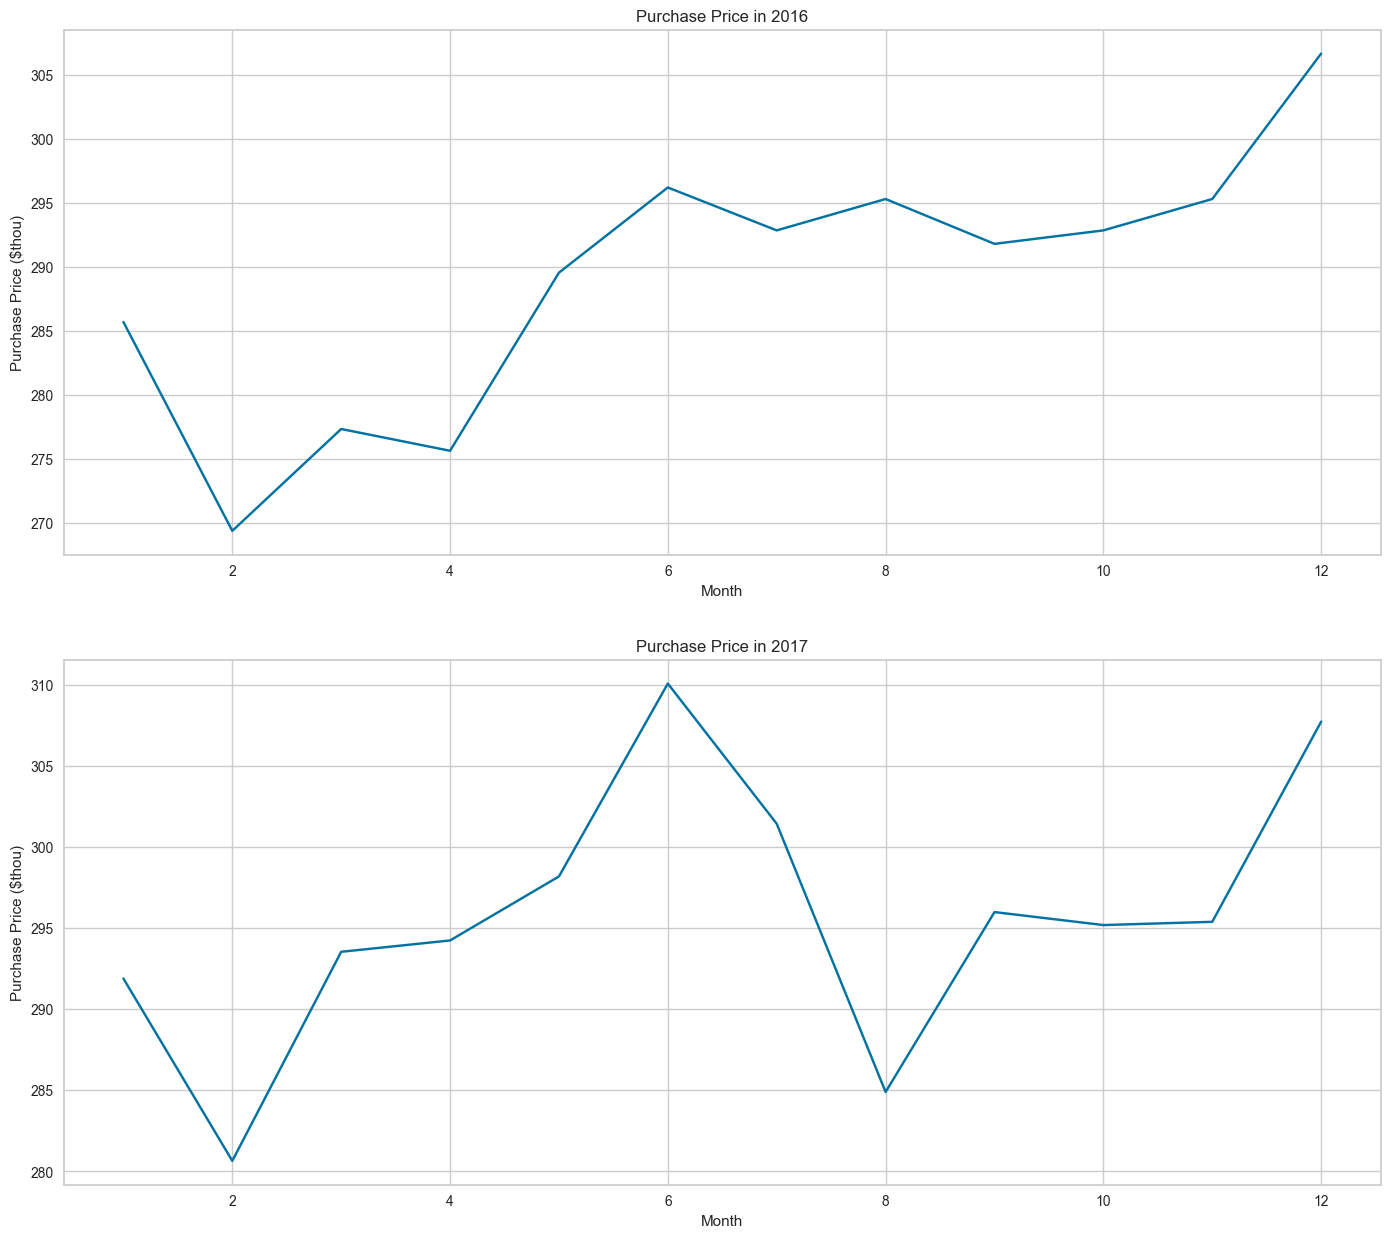

In [10]:
# plotting average housing prices for two years (2016, 2017) to have a better view of seasonality potentials
fig, ax = plt.subplots(2,1, figsize=(17,15))

year = [2016, 2017]

for i in range(2):
    sns.lineplot(data = data[data['Year']==year[i]], x = 'Month', y = 'Purchase Price ($thou)', ax=ax[i]).set(title= 'Purchase Price in '+str(year[i]))

plt.show()

> There might be some seasonality that affects our clusters. This is good to keep in mind when we get the result of our model.

### Exploration Conclusion:
Initial exploration shows that we must (1) drop categorical values, (2) scale our dataset, and (3) perform PCA.

(1) We need to drop categorical values because any clustering methods do not work well with mixed data. (see Ref 2) Since most of our features are numerical dropping the categorical features will help unsupervised algorithms perform better. Plus, we already know the categories so it won't tell us new information about the dataset. However, we should keep in mind that the clustering we uncovered might be heavily influenced by the dropped categorical values. 

(2) Scaling the dataset helps clustering methods, especially those that rely on the distance between data points, as well as PCA. It is recommended for PCA that we scale with StandardScaler because PCA relies on zero-centered inputs (see Ref 3).

(3) We clear have colinearity and instead of making decisions on which features to drop, PCA is a great tool to apply here. It also helps reduce dimensionality with our large dataset of 600,000 rows and 18 features.

## Feature Engineering:
In this part, we will sequentially address the 3 conclusions from our initial observation. The goal is to transform our data into a PC dataframe for further analysis. As a quick summary, these steps are:<br>
(1) Dropping categorical values<br>
(2) Scaling the dataset<br>
(3) Perform CPA

### (1) Dropping Categorical Values

In [11]:
# dropping columns with high correlations with an existing datatype and dropping categorical data
cols = ['Month', 'Year', 'Term to Maturity']
unsupervised = unsupervised.drop(columns=cols)

### (2) Scaling the Dataset

In [12]:
#initalize a scaler
scaler = StandardScaler()

#scale the data
scaled_features = scaler.fit_transform(unsupervised)

# getting a scaled dataframe
X = pd.DataFrame(scaled_features, columns = unsupervised.columns)

#check out the first few rows
X.head()

1901-2000 Mean     ALAND    AWATER  Anomaly (1901-2000 base period)  \
0       -0.381145  2.208044  2.901962                         0.919214   
1       -0.381145  2.208044  2.901962                         0.919214   
2       -1.860682  0.029325  2.904380                         0.299393   
3       -1.860682  0.029325  2.904380                         0.299393   
4       -0.147226  0.562297  0.000387                         1.243881   

   Average Temperature Value  Bottom-Tier Average Home Value Estimate  \
0                  -0.198564                                 0.447549   
1                  -0.198564                                 0.447549   
2                  -1.797585                                -0.349259   
3                  -1.797585                                -0.349259   
4                   0.099064                                -0.512774   

   Effective Rate (%)  INTPTLAT  INTPTLON  Initial Fees and Charges (%)  \
0            2.478430 -0.821152 -2.267297                       0.10542   
1            2.632607 -0.821152 -2.267297                      -0.22329   
2            2.478430  0.846555  0.155777                       0.10542   
3            2.632607  0.846555  0.155777                      -0.22329   
4            2.478430 -1.761200 -0.457390                       0.10542   

   Loan Amount ($thou)  Loan-to-Price Ratio (%)  Purchase Price ($thou)  \
0            -2.007124                -0.913730               -2.350378   
1            -1.279980                 1.004406               -2.535091   
2            -2.007124                -0.913730               -2.350378   
3            -1.279980                 1.004406               -2.535091   
4            -2.007124                -0.913730               -2.350378   

   Share of Total Market (%)  Top-Tier Average Home Value Estimate  
0                  -1.040546                              0.545656  
1                   0.813359                              0.545656  
2                  -1.040546                              0.081240  
3                   0.813359                              0.081240  
4                  -1.040546                             -0.319086

### (3) Principal Component Analysis

In [13]:
#initialize PCA
pca = PCA()

#fit the data
pca.fit(X)

PCA()

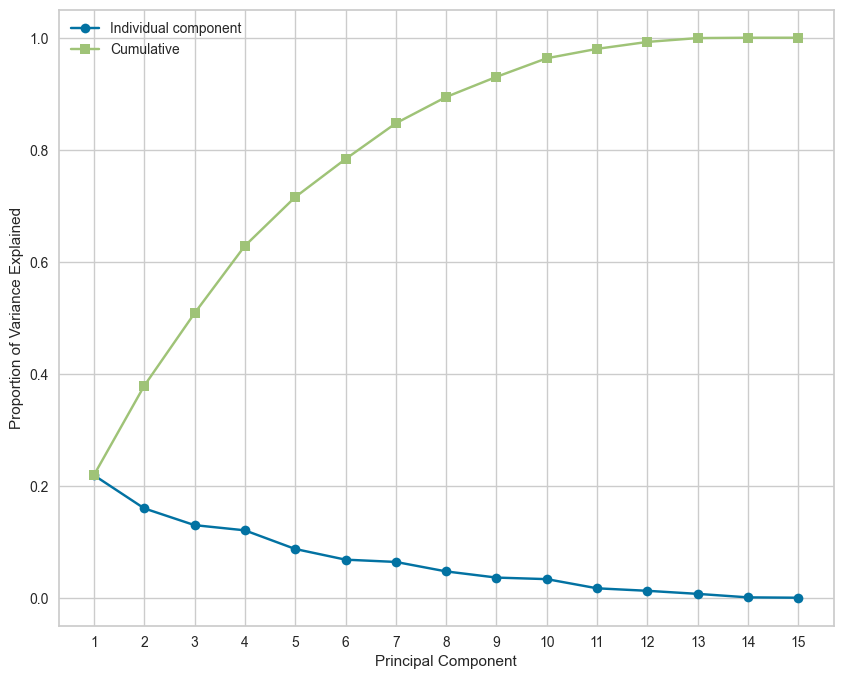

In [14]:
#graphing the cummulative explained variance plot
plt.figure(figsize=(10,8))

#create range of x ticks labels
feats = np.arange(len(pca.explained_variance_ratio_)) + 1

#plotting the lines
plt.plot(feats, pca.explained_variance_ratio_, '-o', label='Individual component')
plt.plot(feats, np.cumsum(pca.explained_variance_ratio_), '-s', label='Cumulative')

#annotating the graph
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xticks(feats)
plt.legend(loc=2)

#showing the graph
plt.show();

In [15]:
np.cumsum(pca.explained_variance_ratio_)

array([0.21879903, 0.37834959, 0.50797121, 0.62830925, 0.71534746,
       0.78332812, 0.84722196, 0.89419062, 0.93015478, 0.96335194,
       0.98015713, 0.9925032 , 0.99938687, 0.99999999, 1.        ])

> Let's choose 10 PCs because they explain 96% of our dataset. The 11th PC does not explain more of our dataset by a substantial amount.

In [16]:
pca = PCA(n_components=10)

#fit and transform X to get the principal components from PCA
X_pca = pd.DataFrame(pca.fit_transform(X), 
                 columns=['PC'+str(i) for i in range(1,11)])
X_pca

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0      -3.102761  1.508369  1.612449  2.184904  1.975812  1.786389  2.346093   
1      -1.802254  1.171494  0.074572  3.954035  1.978705  1.845892  2.290224   
2      -3.379935  2.796132 -1.092142  0.325933 -0.421220  1.352064  2.499917   
3      -2.079428  2.459257 -2.630018  2.095064 -0.418327  1.411567  2.444048   
4      -3.480487 -0.424068  0.101561  0.700817  0.862015  1.490991 -0.341938   
...          ...       ...       ...       ...       ...       ...       ...   
579889  2.801720  0.503773 -0.305471  0.556099 -0.022557 -0.298622 -0.409068   
579890  1.359019  1.354171  0.908505 -1.473032  1.202895 -0.303659 -0.056594   
579891  2.783900  1.000264 -0.672804  0.358428  1.183119 -0.277437 -0.113477   
579892  1.538204  2.058410  1.180004 -1.266393  1.026404 -0.072812 -0.377002   
579893  2.963085  1.704503 -0.401305  0.565067  1.006628 -0.046589 -0.433885   

             PC8       PC9      PC10  
0       1.105544 -1.452726  0.009394  
1       1.111448 -1.392880 -0.060223  
2       0.310244 -1.207435  0.438883  
3       0.316149 -1.147589  0.369267  
4       1.598697 -1.318203  0.164462  
...          ...       ...       ...  
579889 -0.402164  0.337951 -0.896297  
579890 -0.395886  0.357153 -0.249910  
579891 -0.381083  0.698243 -0.518902  
579892 -0.713329 -0.216815 -1.101264  
579893 -0.698526  0.124275 -1.370256  

[579894 rows x 10 columns]

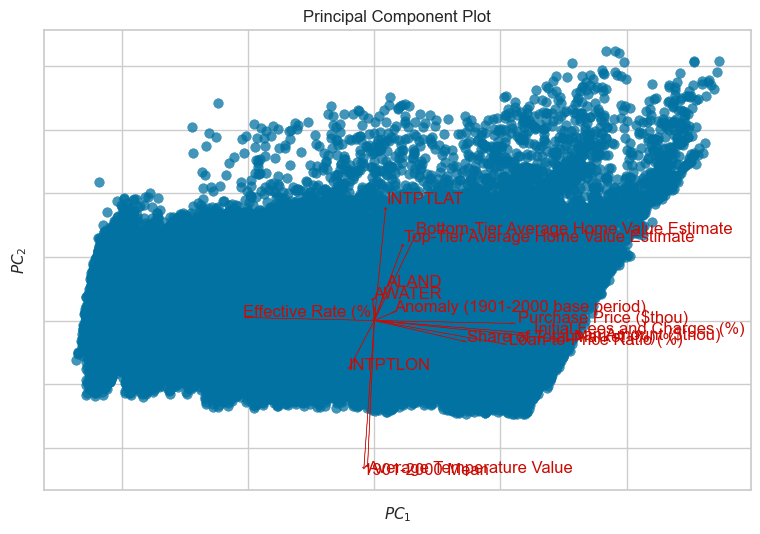

<Axes: title={'center': 'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [17]:
visualizer = PCA_viz(proj_features=True)
visualizer.fit_transform(X)
visualizer.show()

> The Principal Component Plot shows interesting direction of our featyres. It seems temperature-related features (Average Value and 1991-2000 Mean) explain the dataset as much as housing-related features (purchase price, initial fees, etc.) and latitude. Latitude and Top-/Bottom- Tier Average Values seem to pull our data in relatively the same direction, suggesting colinearity, and are not in the same directions of Housing-related features as well as Temperature-related features.

## Model #1: KMeans Clustering

We will first attempt to do a KMeans clustering model and see if it a good unsupervised model for our data. I will proceed with a random_state = 10 and n_init = 10. 

We will also be using the **Davies-Bouldin Index** for scoring our dataset. I tried using Silhouette Score as my metric but my computer cannot calculate this score with the amount of data I have. When trying to calculate the Silhouette Score for a default KMeans model with the PCA-transformed dataframe, I had to intervene at 52 minutes of runtime. For Davies-Bouldin, it took 8.3 seconds to run.

The Davies-Bouldin Index calculated the average 'similarity' between clusters. The smaller the index, the better with 0 being the lowest score (see Ref 6).

In [20]:
seed=10

### Train: Default KMeans Model
We will first train a KMeans model by default.

In [22]:
#Initialize a default Kmeans model
kmeans_default = KMeans(n_init=seed, random_state=seed)

#Train the Model
kmeans_default.fit(X)

#Get cluster predictions
y_pred_train_kmeans = kmeans_default.predict(X)

#Evaluate perfomance
kmeans_score_train = davies_bouldin_score(X, y_pred_train_kmeans)

#Print the performance
print('Davies-Bouldin score:', round(kmeans_score_train, 3))

Davies-Bouldinscore: 1.577


> Our next objective is to find the best K to see how much we can lower this score.

### Tuning: Finding the Best K
We will now use three metrics: elbowvisualizer, calinski harabasz, and SilhouetteVisualizer to determine the best cluster number for our KMeans.

In [24]:
#KElbowVisualizer()

#initalizing the model and visualizer
model = KMeans(n_init=seed, random_state=seed)
visualizer = KElbowVisualizer(model, k=(2,12), timings=False)

#fitting the data
visualizer.fit(X)

#plotting
visualizer.show()

In [ ]:
# Calinski Harabasz

#initalizing the model and visualizer
model = KMeans(n_init=seed, random_state=seed)
visualizer = KElbowVisualizer(model, k=(2,12), metric='calinski_harabasz', timings=False, locate_elbow=True)

#fitting the data
visualizer.fit(X)

#plotting
visualizer.show()

>From the two graphs, I will try both a k=5 and k=2 for my SilhouetteVisualizer().

In [ ]:
# SilhouetteVisualizer with k = 2

#initalizing the model and visualizer
model = KMeans(2, n_init=10, random_state=1)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

#fitting the data
visualizer.fit(X) 

#showing the model
visualizer.show()

In [ ]:
# SilhouetteVisualizer with k = 5

#initalizing the model and visualizer
model = KMeans(6, n_init=10, random_state=1)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

#fitting the data
visualizer.fit(X) 

#showing the model
visualizer.show()

The graphs show that with k = 2, our clusters are very accurate. We think the top-tier/bottom-tier values play a big role in dictating this pattern, but for now, it is still interesting to see!

### Best KMeans: Training the Final KMean Model
We finally have our best KMeans model with k = 2.

In [ ]:
# final KMeans model

#Initialize a default Kmeans model
kmeans_best = KMeans(2, n_init=10, random_state=1)

#Train the Model
kmeans_best.fit(X)

#Get cluster predictions
y_pred_test_kmeans = kmeans_best.predict(X)

#Evaluate perfomance
silhouette_score_test_kmeans = silhouette_score(X, y_pred_test_kmeans)

#Print the performance
print('Silhouette score:', round(silhouette_score_test_kmeans, 3))

### Visualized the Clusters for KMeans
We will extract the labels and visualize the results.

In [ ]:
# creating a results dataframe with labels
X_results = X.copy()

X_results["labels_kmeans"] = y_pred_test_kmeans
X_results.head()

In [ ]:
# visualize the clusters with purchase price and average temperature, two of our most interested features

#initalizing subplots
fig, ax = plt.subplots(1,2, figsize=(15,7))

#selecting interested features
cols = ['Purchase Price ($thou)','Average Temperature']

#plotting
for i in range(2):
    sns.boxplot(ax = ax[i], data= X_results, y = cols[i], x = 'labels_kmeans').set(xlabel = 'Cluster')

#showing the plot
plt.tight_layout(pad=2)
plt.show()

**Conclusions:** The KMeans model suggest that there are two natural clusters for our data. In 2018, average temperature is quite evenly distributed amongst the two clusters, but purchase price is condensed in one cluster more than the other. There are definitely patterns in our data that is worth exploring more.

In [ ]:
#The code below is reserved for sprint 5 (another model). Do not include in sprint 4 grading.

# plotting the dendogram

# style = ['single', 'average', 'complete', 'ward']

# for i in 
# avgl = linkage(X, i)
# plt.figure(figsize=(20,10))
# plt.grid(False)
# plt.title("Hierarchical Clustering, Single Linkage")
# plt.xlabel("index")
# plt.ylabel("distance")
# dendrogram(avgl,leaf_font_size=10);

## References:
1. Lab 10: https://canvas.cmu.edu/courses/38950/files/11085230?module_item_id=5780126&fd_cookie_set=1
2. https://medium.com/analytics-vidhya/the-ultimate-guide-for-clustering-mixed-data-1eefa0b4743b
3. https://medium.com/@hhuseyincosgun/which-data-scaling-technique-should-i-use-a1615292061e
4. https://stackoverflow.com/questions/993358/creating-a-range-of-dates-in-python
5. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.date_range.html
6. https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient